### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [1]:
# ! pip  install nibabel
!python 1_build_adj_matrix.py ../data/simplePhantoms/fanning_2d_5bundles/wm_vf.nii.gz ../data/simplePhantoms/fanning_2d_5bundles/fods.nii.gz --threshold 0.02 graph

Figure(640x480)
node indices [ 306  307  359  361  362  363  413  417  418  419  466  467  468  469
  470  471  472  521  522  523  524  575  576  577  578  579  627  628
  629  630  631  632  633  634  683  684  685  686  687  693  739  740
  748  788  798  802  843  844  845  849  853  854  856  857  897  898
  899  900  905  906  907  908  909  950  951  952  953  954  955  958
  959  960  961  962  963  964 1004 1005 1006 1007 1008 1009 1010 1011
 1012 1013 1014 1015 1016 1017 1018 1020 1058 1059 1060 1061 1062 1063
 1064 1065 1066 1067 1068 1069 1070 1071 1073 1112 1114 1115 1116 1117
 1118 1119 1120 1121 1122 1123 1124 1164 1171 1172 1173 1174 1175 1176
 1218 1219 1220 1221 1225 1226 1227 1228 1229 1270 1271 1272 1273 1274
 1275 1276 1277 1278 1279 1280 1281 1282 1283 1300 1301 1302 1303 1304
 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318
 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332
 1333 1334 1335 1336 1337 1338 1339 1340 1341 13

### Afficher le graphe: 

Figure(640x480)


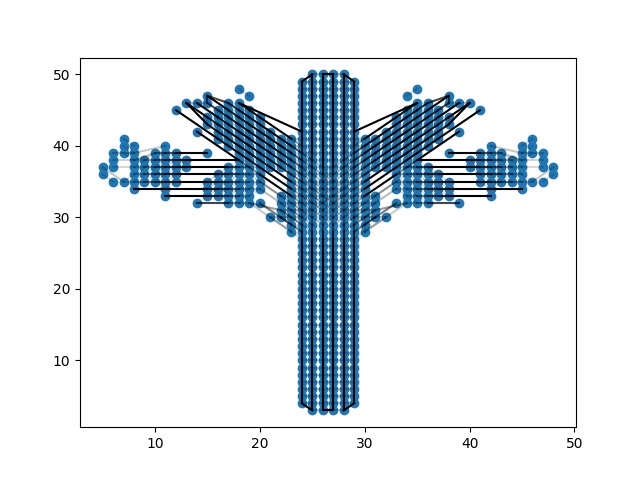

In [4]:
import sys

sys.path.append(r"C:\Users\harsh\quactography")

from IPython.display import Image, display  # type: ignore
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))




### Créer une matrice d'adjacence aléatoire:

In [39]:
!python 1_build_random_adj_matrix.py 7 7  False rand_graph

4
7


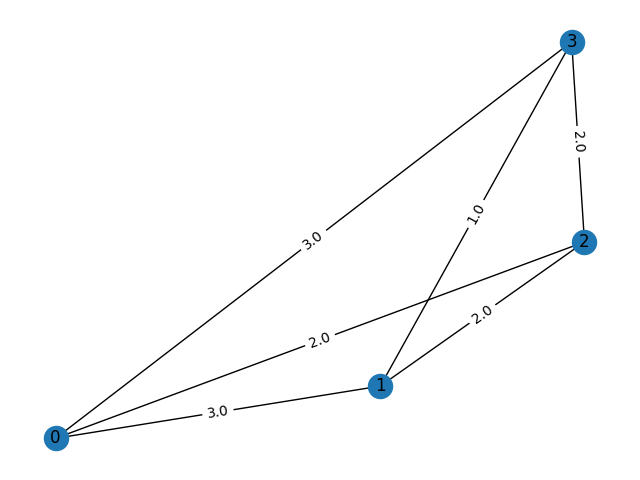

In [40]:
!python 2_draw_random_adj_matrix.py rand_graph rand_graph_visu
display(Image(filename='rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [41]:
!python 3_find_max_intensity_diffusion_path.py rand_graph 1 0 qaoa_solver_infos edge --alphas  2   --reps 3  -npr 5  

SparsePauliOp(['IIIIII', 'IIIIIZ', 'IIIZII', 'IZIIII', 'ZIIIII', 'IZZIII', 'IIZIIZ', 'IZIIIZ', 'IIIIZZ', 'IIIZIZ', 'IIIZZI', 'ZIZIZI', 'ZZIZII'],
              coeffs=[ 5.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,  1. +0.j,  1. +0.j,  1. +0.j,
  1. +0.j,  1. +0.j,  1. +0.j,  1. +0.j, -4. +0.j, -4. +0.j])

 Calculating qubits as edges......................
------------------------MULTIPROCESS SOLVER FINISHED-------------------------------


### Visualiser les chemins qui maximise la valeur absolue des poids:

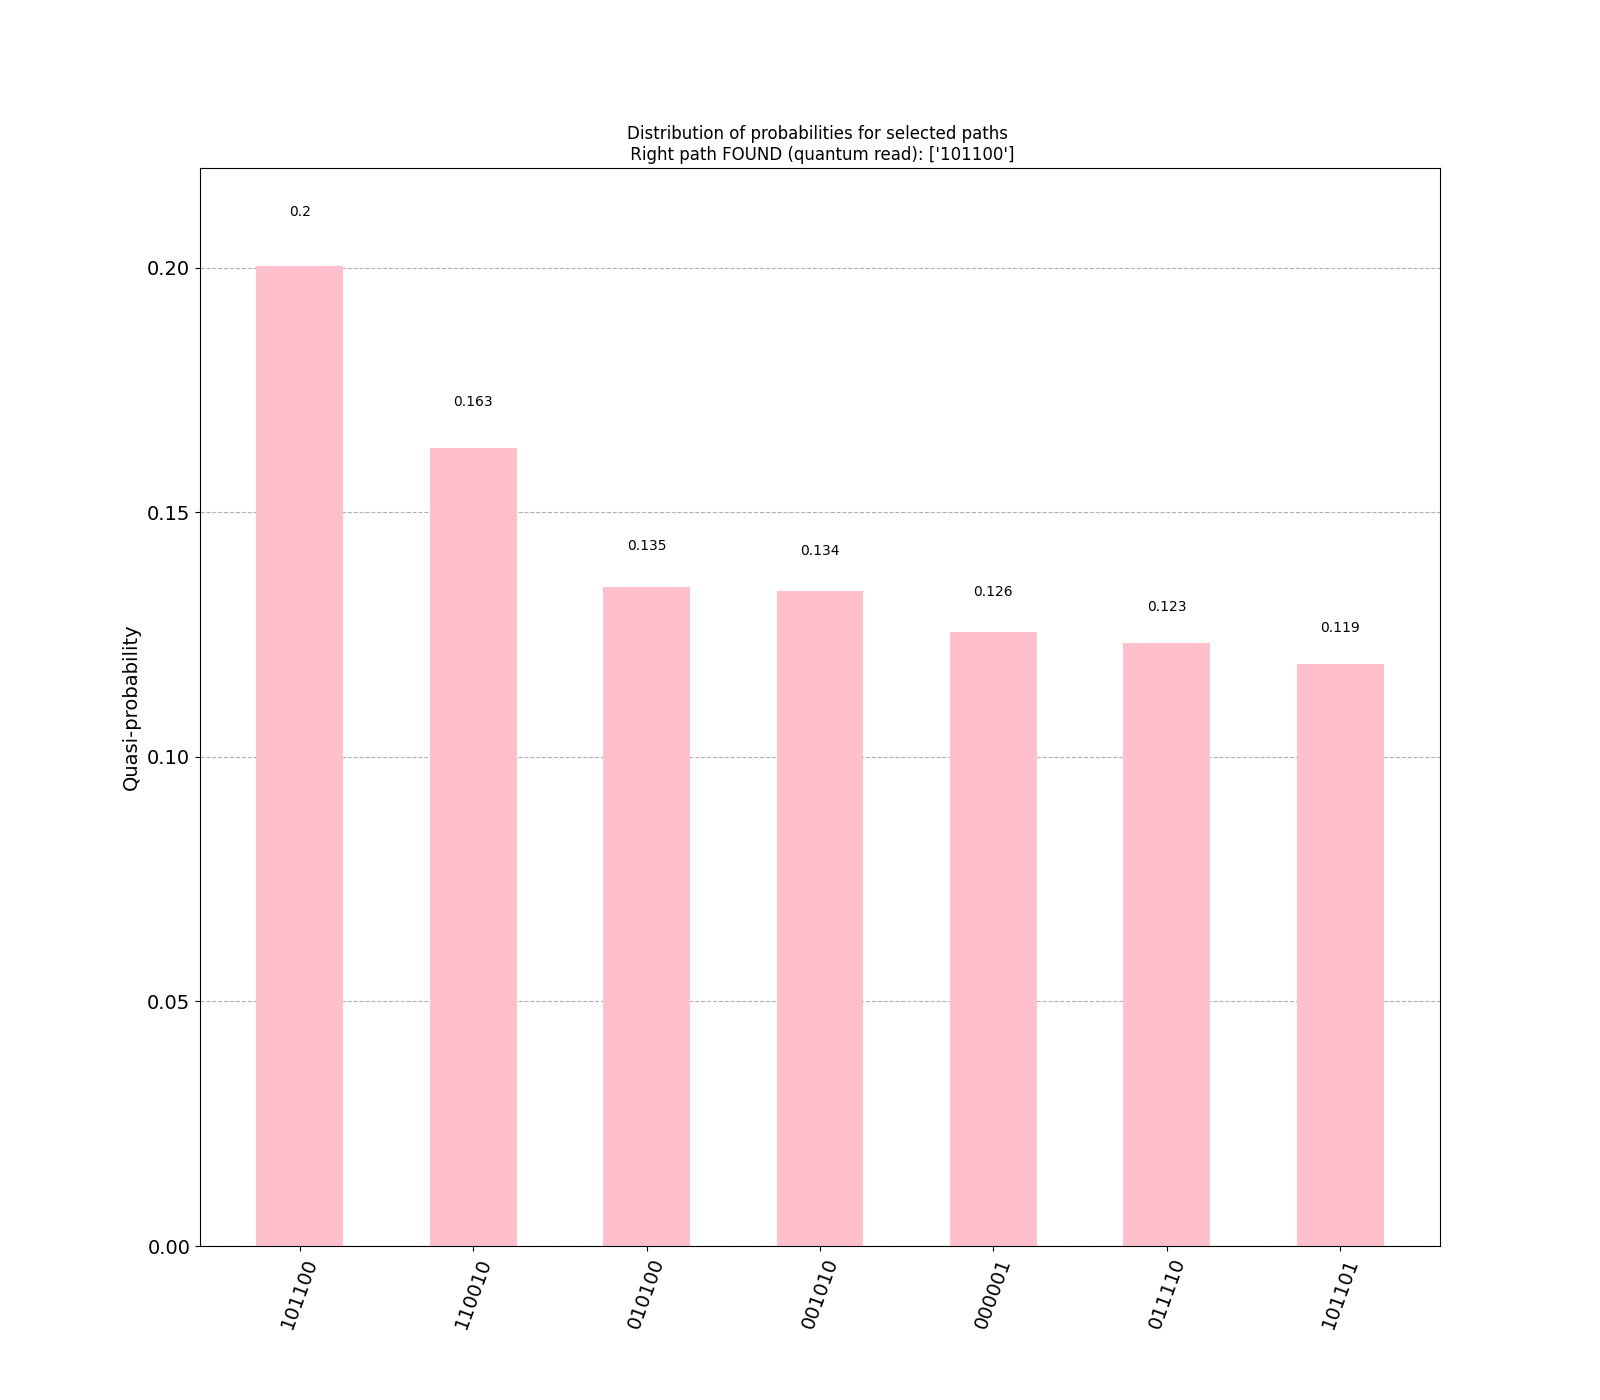

In [42]:
from IPython.display import Image, display  # type: ignore
!python 4_plot_distribution_probabilities.py  qaoa_solver_infos_alpha_2.npz  visu_total_dist visu_selected_dist edge
display(Image(filename='visu_selected_dist_0.png'))
# display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

### Visualiser les chemins optimaux:

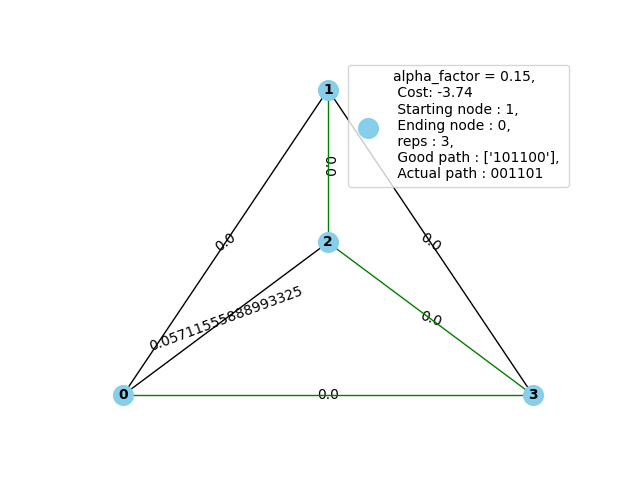

In [43]:
!python 5_plot_optimal_paths.py graph  qaoa_solver_infos_alpha_2.npz opt_paths edge

display(Image(filename='opt_paths_0_alpha_2.00.png'))
